PROJECT 1


In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\amith\Downloads\archive (1)\Global Superstore.txt", sep='\t', encoding='utf-8')


In [5]:
#missing values
df.isnull().sum()

#filling by median
df['Sales'].fillna(df['Sales'].median(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers using IQR
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Profit'] >= Q1 - 1.5*IQR) & (df['Profit'] <= Q3 + 1.5*IQR)]

C:\Users\amith\AppData\Local\Temp\ipykernel_1208\784921418.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].median(), inplace=True)


In [6]:
#statistical analysis
print(df.describe())
print(df[['Sales', 'Profit']].corr())

           Discount      记录数        Profit      Quantity        Row ID  \
count  41535.000000  41535.0  41535.000000  41535.000000  41535.000000   
mean       0.129872      1.0     13.228016      3.206091  25796.098688   
std        0.201619      0.0     25.720023      2.095874  14919.222019   
min        0.000000      1.0    -55.125000      1.000000      1.000000   
25%        0.000000      1.0      0.644700      2.000000  12676.500000   
50%        0.000000      1.0      7.980000      3.000000  26129.000000   
75%        0.200000      1.0     24.060000      4.000000  38742.500000   
max        0.800000      1.0     91.995400     14.000000  51290.000000   

              Sales  Shipping Cost          Year       weeknum  
count  41535.000000   41535.000000  41535.000000  41535.000000  
mean     123.755869      13.331553   2012.780234     31.240039  
std      204.173452      26.304509      1.097741     14.425172  
min        0.000000       0.002000   2011.000000      1.000000  
25%     

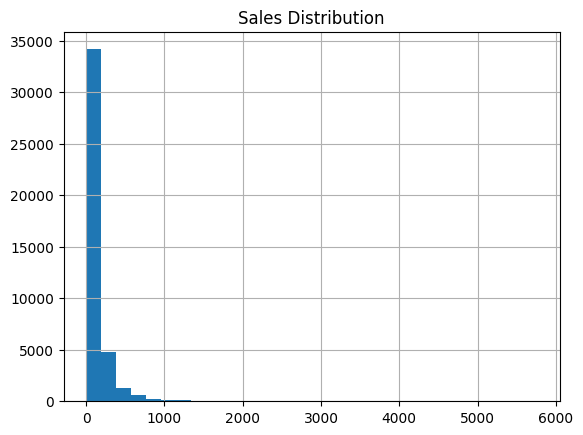

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df['Sales'].hist(bins=30)
plt.title('Sales Distribution')
plt.show()

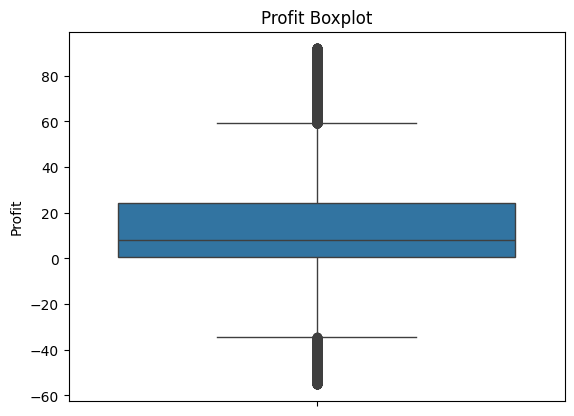

In [8]:
# Boxplot
sns.boxplot(df['Profit'])
plt.title('Profit Boxplot')
plt.show()


PROJECT 2

In [14]:
import pandas as pd

df2 = pd.read_csv(r"C:\Users\amith\Downloads\sales_data_sample.csv", encoding='latin1')


In [15]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(41535, 27)
<class 'pandas.core.frame.DataFrame'>
Index: 41535 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        41535 non-null  object 
 1   City            41535 non-null  object 
 2   Country         41535 non-null  object 
 3   Customer ID     41535 non-null  object 
 4   Customer Name   41535 non-null  object 
 5   Discount        41535 non-null  float64
 6   Market          41535 non-null  object 
 7   记录数             41535 non-null  int64  
 8   Order Date      41535 non-null  object 
 9   Order ID        41535 non-null  object 
 10  Order Priority  41535 non-null  object 
 11  Product ID      41535 non-null  object 
 12  Product Name    41535 non-null  object 
 13  Profit          41535 non-null  float64
 14  Quantity        41535 non-null  int64  
 15  Region          41535 non-null  object 
 16  Row ID          41535 non-null  int64  
 17  Sales           41535 no

In [17]:
df.drop_duplicates(inplace=True)

# Normalize column names to upper for easy matching
df.columns = df.columns.str.strip().str.upper()

# Fill missing values safely
if 'SALES' in df.columns:
    df['SALES'].fillna(df['SALES'].median(), inplace=True)

if 'PROFIT' in df.columns:
    df['PROFIT'].fillna(df['PROFIT'].median(), inplace=True)

# Convert date column
for col in df.columns:
    if 'DATE' in col:
        df[col] = pd.to_datetime(df[col], errors='coerce')


C:\Users\amith\AppData\Local\Temp\ipykernel_1208\176442870.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SALES'].fillna(df['SALES'].median(), inplace=True)
C:\Users\amith\AppData\Local\Temp\ipykernel_1208\176442870.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

Columns: Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


C:\Users\amith\AppData\Local\Temp\ipykernel_1208\1510106810.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SALES'].fillna(df['SALES'].median(), inplace=True)


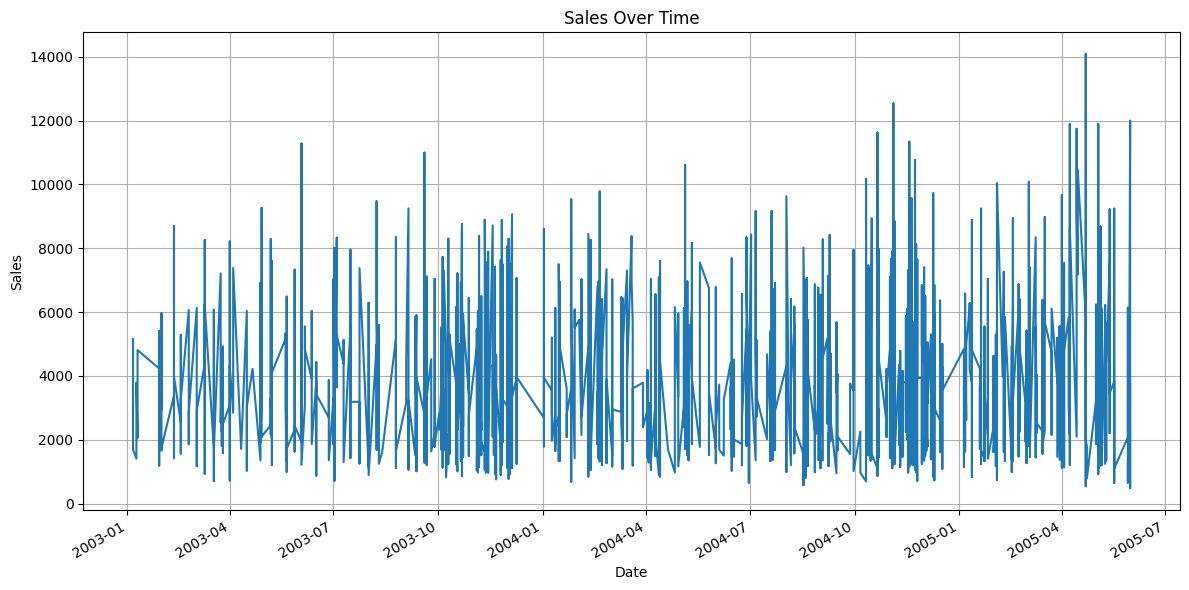

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\amith\Downloads\sales_data_sample.csv", encoding='latin1')


df.columns = df.columns.str.strip().str.upper()


print("Columns:", df.columns)


df.drop_duplicates(inplace=True)


if 'SALES' in df.columns:
    df['SALES'].fillna(df['SALES'].median(), inplace=True)
if 'PROFIT' in df.columns:
    df['PROFIT'].fillna(df['PROFIT'].median(), inplace=True)



if 'ORDERDATE' in df.columns:
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

    # Step 7: Sort by date and set index
    df.sort_values('ORDERDATE', inplace=True)
    df.set_index('ORDERDATE', inplace=True)

    # Step 8: Plot Sales Over Time
    plt.figure(figsize=(12, 6))
    df['SALES'].plot()
    plt.title('Sales Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Date column not found! Please check your dataset.")


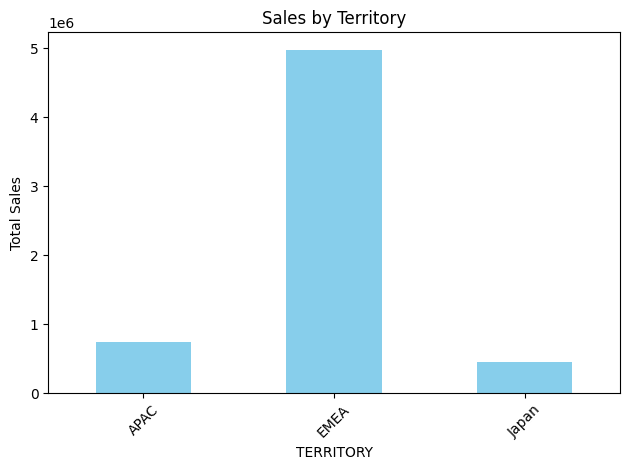

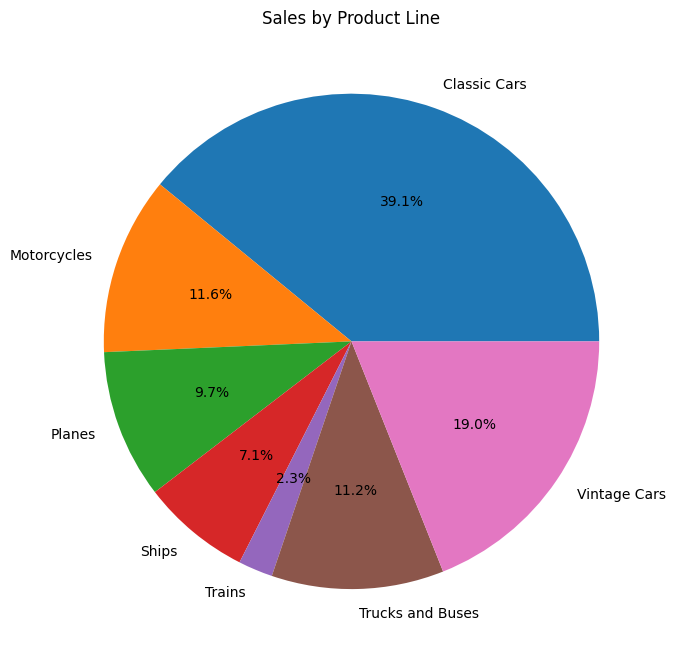

In [22]:
import matplotlib.pyplot as plt

# Bar plot: SALES by TERRITORY (or REGION equivalent)
if 'TERRITORY' in df.columns:
    df.groupby('TERRITORY')['SALES'].sum().plot(kind='bar', title='Sales by Territory', color='skyblue')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'TERRITORY' not found. Try 'COUNTRY' or check df.columns")

# Pie chart: SALES by PRODUCTLINE (or CATEGORY equivalent)
if 'PRODUCTLINE' in df.columns:
    df.groupby('PRODUCTLINE')['SALES'].sum().plot(
        kind='pie', autopct='%1.1f%%', title='Sales by Product Line', figsize=(7, 7))
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'PRODUCTLINE' not found. Try 'CATEGORY' or check df.columns")



In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Feature and target
X = df[['PRICEEACH', 'QUANTITYORDERED']]
y = df['SALES']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score on Test Data:", model.score(X_test, y_test))



Model Coefficients: [ 59.29373068 101.94127136]
Intercept: -4997.4374073549925
R^2 Score on Test Data: 0.7381373420996222
